In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

%matplotlib inline

In [10]:
#nltk.download('punkt')

In [11]:
data_1 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 35 CSV.csv", encoding='latin-1')
data_2 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 37 CSV.csv", encoding='latin-1')
data_3 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 38 CSV.csv", encoding='latin-1')
data_4 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 39 CSV.csv", encoding='latin-1')
data = data_1.append(data_2, ignore_index=True)
data = data.append(data_3, ignore_index=True)
data = data.append(data_4, ignore_index=True)
data.head()

,date,name,currency,language,name2,name3,ageGroup,articleId,colors,colorGroup,...,ped,pid,sportsCategory,subBrand,technologies,type,url,price,territories,type5
0,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,011040,Black/Footwear White,schwarz,...,NaN,04/18/2013,Fußball,Performance,EVA,NaN,https://www.adidas.de/world-cup-fussballschuh/...,NaN,NaN,NaN
1,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,015110,Black/Footwear White/Black,schwarz,...,NaN,04/18/2013,Fußball,Performance,EVA,NaN,https://www.adidas.de/copa-mundial-fussballsch...,NaN,NaN,NaN
2,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,019000,Black/Footwear White,schwarz,...,NaN,04/18/2013,Freizeit,Performance,EVA,NaN,https://www.adidas.de/samba-leather-schuh/0190...,NaN,NaN,NaN
3,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,019099,Black/White,schwarz,...,NaN,01/28/2015,Freizeit,Sport inspired,EVA,NaN,https://www.adidas.de/samba-super-schuh/019099...,NaN,NaN,NaN
4,08/29/2018,adidas,EUR,de-DE,DEU,own eCom,adults,019228,Black/Footwear White/Red,schwarz,...,NaN,04/18/2013,Fußball,Performance,TRAXION|EVA,NaN,https://www.adidas.de/mundial-team-fussballsch...,NaN,NaN,NaN


In [12]:
data.isnull().sum()

date                    0
name                    0
currency                0
language                0
name2                   0
name3                 368
ageGroup            10309
articleId             368
colors              10045
colorGroup          37566
consumerRating        368
currentPrice          368
description          5033
discountedSince    277723
division              368
gender              11363
group               76709
imageUrl              404
initialPrice          368
modelNumber           368
name4                 371
ped                416727
pid                   368
sportsCategory      88758
subBrand            93557
technologies       281645
type               274499
url                   368
price              439691
territories        439691
type5              439691
dtype: int64

In [13]:
data.language.unique()

array(['de-DE', 'en-US', 'en-GB'], dtype=object)

In [14]:
data.subBrand.unique()

array(['Performance', 'Sport inspired', 'adidas by Stella McCartney',
       'Essentials', nan, 'Porsche Design Sport by adidas',
       'Sport Inspired', 'sport inspired', 'Sport', 'performance',
       'adidas by stella mccartney', 'porsche design sport by adidas',
       'essentials', 'adidas neo', 'Sportswear', 'Jordan', 'Collections',
       'UAS', 'Hurley'], dtype=object)

In [15]:
# Filtering US and UK
#data = data.loc[data["language"].isin(['de-DE'])]

In [16]:
#data.group.unique()

In [17]:
data_req = data.loc[:,["name", "description", "division","sportsCategory", "subBrand", "group", "name2", "name3", "name4", "url", "colors", "colorGroup", "imageUrl"]]

In [18]:
data_req = data_req.drop_duplicates()

In [19]:
len(data_req)

172818

In [20]:
data_req_x = data_req.loc[:,["name", "description", "division", "group", "name2", "name3", "name4", "subBrand","sportsCategory", "url", "colors","imageUrl"]]
data_req_y = data_req.loc[:, ["colorGroup"]]

In [21]:
data_req_x = data_req_x.fillna("unknown")
data_req = pd.concat([data_req_x, data_req_y], axis=1)

In [22]:
len(data_req)

172818

In [23]:
data_req = data_req.dropna()

In [24]:
data_req = data_req.drop_duplicates()

In [25]:
data_req["description"]  = data_req["name"] +" " + data_req["description"] +" " + data_req["division"] +" " + data_req["group"] +" " + data_req["name2"]+" " + data_req["name3"]+" " + data_req["name4"]+" " + data_req["sportsCategory"]+" " + data_req["url"]+" " + data_req["colors"]+" " + data_req["imageUrl"]+" " + data_req["subBrand"]

In [26]:
data_req = data_req.drop(["name", "division", "group", "name2", "name3", "name4", "subBrand", "url", "colors", "imageUrl", "sportsCategory"], axis = 1)

In [27]:
data_req.columns = ["description", "subBrand"]

In [28]:
data_req.subBrand.unique()

array(['schwarz', 'orange', 'weiß', 'blau', 'rot', 'rosa', 'grün',
       'silber', 'grau', 'gelb', 'braun', 'türkis', 'lila', 'stone',
       'gold', 'mehrfarbig', 'beige', 'aqua', 'clear', 'carbon', 'rose',
       'olive', 'off white', 'petrol', 'coral', 'maroon', 'lilac',
       'grey heather', 'multicolor', 'teal', 'multi', 'Black', 'Blue',
       'White', 'Red', 'Multicolor', 'Silver', 'Orange', 'Green', 'Grey',
       'Pink', 'Brown', 'Yellow', 'Turquoise', 'Purple', 'Gold', 'Braun',
       'Stone', 'Aqua', 'Multicolour', 'Beige', 'Clear', 'Grey Heather',
       'multicolour', 'Braun-schwarz', 'Teal', 'Schwarz', 'Weiß', 'Blau',
       'Khaki', 'Lila', 'Rot', 'Creme', 'Silber', 'Olive', 'Grau', 'Grün',
       'Gelb', 'Fir', 'College Navy', 'Print', 'Volt', 'Wolf Grey',
       'Obsidian', 'Cool Grey', 'Pure Platinum', 'Dunkelgrau',
       'Midnight Navy', 'Prism Pink', 'Anthrazit', 'Deep Royal Blue',
       'Cargo Khaki', 'Medium Blue', 'Binary Blue', 'University Red',
       'Hype

In [29]:
len(data_req)

153365

In [30]:
data_req = data_req.drop_duplicates()

In [31]:
data_req.subBrand = data_req.subBrand.str.lower()
data_req.description = data_req.description.str.lower()

In [32]:
data_req.subBrand.unique()

array(['schwarz', 'orange', 'weiß', 'blau', 'rot', 'rosa', 'grün',
       'silber', 'grau', 'gelb', 'braun', 'türkis', 'lila', 'stone',
       'gold', 'mehrfarbig', 'beige', 'aqua', 'clear', 'carbon', 'rose',
       'olive', 'off white', 'petrol', 'coral', 'maroon', 'lilac',
       'grey heather', 'multicolor', 'teal', 'multi', 'black', 'blue',
       'white', 'red', 'silver', 'green', 'grey', 'pink', 'brown',
       'yellow', 'turquoise', 'purple', 'multicolour', 'braun-schwarz',
       'khaki', 'creme', 'fir', 'college navy', 'print', 'volt',
       'wolf grey', 'obsidian', 'cool grey', 'pure platinum',
       'dunkelgrau', 'midnight navy', 'prism pink', 'anthrazit',
       'deep royal blue', 'cargo khaki', 'medium blue', 'binary blue',
       'university red', 'hyper pink', 'carbon heather', 'game royal',
       'work blue', 'sequoia', 'glacier blue', 'dark obsidian',
       'team red', 'blue tint', 'rush blue', 'marine', 'gym red',
       'signal blue', 'dark stucco', 'heather', 'b

In [33]:
lens = data_req.description.str.len()
lens.mean(), lens.std(), lens.max()

(687.8169660613569, 267.6378344452206, 3728)

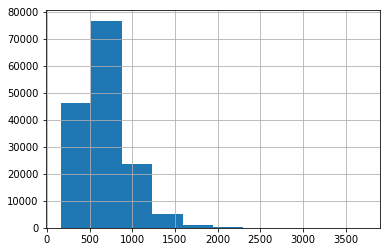

In [34]:
lens.hist();

In [35]:
data_req = data_req.dropna()

In [36]:
len(data_req)

153365

In [37]:
one_hot = pd.get_dummies(data_req.subBrand)

In [38]:
label_cols = data_req.subBrand.dropna().unique()

In [39]:
label_cols

array(['schwarz', 'orange', 'weiß', 'blau', 'rot', 'rosa', 'grün',
       'silber', 'grau', 'gelb', 'braun', 'türkis', 'lila', 'stone',
       'gold', 'mehrfarbig', 'beige', 'aqua', 'clear', 'carbon', 'rose',
       'olive', 'off white', 'petrol', 'coral', 'maroon', 'lilac',
       'grey heather', 'multicolor', 'teal', 'multi', 'black', 'blue',
       'white', 'red', 'silver', 'green', 'grey', 'pink', 'brown',
       'yellow', 'turquoise', 'purple', 'multicolour', 'braun-schwarz',
       'khaki', 'creme', 'fir', 'college navy', 'print', 'volt',
       'wolf grey', 'obsidian', 'cool grey', 'pure platinum',
       'dunkelgrau', 'midnight navy', 'prism pink', 'anthrazit',
       'deep royal blue', 'cargo khaki', 'medium blue', 'binary blue',
       'university red', 'hyper pink', 'carbon heather', 'game royal',
       'work blue', 'sequoia', 'glacier blue', 'dark obsidian',
       'team red', 'blue tint', 'rush blue', 'marine', 'gym red',
       'signal blue', 'dark stucco', 'heather', 'b

In [40]:
minCount = 10
subBrand_minCount = pd.DataFrame((data_req.subBrand.value_counts() > minCount).reset_index())

In [41]:
subBrand_drop = subBrand_minCount.loc[subBrand_minCount["subBrand"] == False]

In [42]:
subBrand_drop

,index,subBrand
102,sequoia,False
103,work blue,False
104,summit white,False
105,light blue,False
106,150 - not defined,False
107,dark stucco,False
108,floral,False
109,team orange,False
110,dunkelgrau,False
111,ice blue,False


In [43]:
label_cols = np.setdiff1d(label_cols, subBrand_drop["index"])

In [44]:
data_req = pd.concat([data_req, one_hot], axis=1)

In [45]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [46]:
description = "description"

In [47]:
data_req = data_req.drop(subBrand_drop["index"], axis = 1)

In [48]:
np.random.seed(123)
data_req_sample = data_req.sample(frac=0.7)

In [49]:
train = data_req.loc[data_req.index.isin(data_req_sample.index)]
test = data_req.loc[~data_req.index.isin(data_req_sample.index)]

In [50]:
test_subBrand = test.subBrand

In [51]:
#test_subBrand

In [52]:
train = train.drop("subBrand", axis = 1)
test = test.drop("subBrand", axis = 1)

In [53]:
# token_dict = {}
# stemmer = PorterStemmer()

# def stem_tokens(tokens, stemmer):
#     stemmed = []
#     for item in tokens:
#         stemmed.append(stemmer.stem(item))
#     return stemmed

# def tokenize(text):
#     tokens = nltk.word_tokenize(text)
#     stems = stem_tokens(tokens, stemmer)
#     return stems

In [54]:
# from stop_words import get_stop_words
# stop_words_english = get_stop_words('english')
# stop_words_german = get_stop_words('german')

In [55]:
#stop_words_english.append(stop_words_german)

In [56]:
# stop_words_english = sorted(set(map(tuple, stop_words_english)), reverse=True)

In [57]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1, stop_words = None )
trn_term_doc = vec.fit_transform(train[description])
test_term_doc = vec.transform(test[description])

In [58]:
trn_term_doc, test_term_doc

(<107356x371645 sparse matrix of type '<class 'numpy.float64'>'
 	with 21588193 stored elements in Compressed Sparse Row format>,
 <46009x371645 sparse matrix of type '<class 'numpy.float64'>'
 	with 9160095 stored elements in Compressed Sparse Row format>)

In [59]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [60]:
x = trn_term_doc
test_x = test_term_doc

In [61]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit 220 - gold
fit 230 - silver
fit amarillo
fit anthracite
fit anthrazit
fit aqua
fit assorted
fit battle blue
fit beige
fit binary blue
fit black
fit blau
fit blue
fit blue tint
fit braun
fit brown
fit burgundy crush
fit camo
fit carbon
fit carbon heather
fit cardinal
fit charcoal
fit charcoal heather
fit clear
fit college navy
fit cool grey
fit coral
fit cream
fit creme
fit cyber
fit dark blue
fit dark obsidian
fit deep royal blue
fit denim
fit field purple
fit fir
fit game royal
fit gelb
fit gemischt
fit glacier blue
fit gold
fit grau
fit gray
fit green
fit grey
fit grey heather
fit grey/silver
fit grün
fit gym blue
fit gym red
fit heather
fit khaki
fit lila
fit lilac
fit linen
fit marine
fit marineblau
fit maroon
fit mehrfarbig
fit metallic
fit midnight navy
fit multi
fit multi-color
fit multi-colored
fit multi-colour
fit multicolor
fit multicolour
fit navy
fit neon
fit new orchid
fit nude
fit obsidian
fit off white
fit olive
fit orange
fit petrol
fit pink
fit print
fit purple
fit

In [64]:
preds.shape

(46009, 102)

In [65]:
predictions = pd.DataFrame(preds, columns = label_cols)

In [66]:
test.index = np.arange(0, len(test))
test_subBrand.index = np.arange(0, len(test))

In [67]:
len(test)

46009

In [68]:
submid = pd.DataFrame({'description': test["description"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = label_cols)], axis=1)

In [69]:
submission.head()

,description,220 - gold,230 - silver,amarillo,anthracite,anthrazit,aqua,assorted,battle blue,beige,...,thunder blue,turquoise,türkis,university red,violet,violett,weiß,white,wolf grey,yellow
0,adidas dieser klassische fußballschuh überzeug...,0.000022,0.000023,0.000025,0.000031,0.000027,0.000034,0.000023,0.000024,0.000371,...,0.000024,0.000036,0.000067,0.000030,0.000025,0.000021,0.004179,0.000009,0.000031,0.000221
1,adidas hier wird einem legendären fußballschuh...,0.000022,0.000021,0.000023,0.000033,0.000034,0.000026,0.000025,0.000022,0.000546,...,0.000022,0.000038,0.000081,0.000025,0.000023,0.000023,0.001400,0.000001,0.000026,0.000060
2,adidas ein fußballschuh mit tf-sohle und klass...,0.000024,0.000026,0.000033,0.000037,0.000028,0.000028,0.000022,0.000027,0.000214,...,0.000025,0.000038,0.000078,0.000023,0.000028,0.000024,0.003664,0.000026,0.000027,0.000056
3,adidas die adilette wurde 1972 auf den markt g...,0.000032,0.000030,0.000030,0.000034,0.000032,0.000034,0.000028,0.000033,0.000093,...,0.000032,0.000042,0.000044,0.000028,0.000032,0.000026,0.006535,0.000214,0.000032,0.000079
4,adidas ankle straps to hold your shin guards i...,0.000028,0.000027,0.000028,0.000036,0.000029,0.000029,0.000028,0.000028,0.000079,...,0.000028,0.000039,0.000041,0.000030,0.000031,0.000029,1.000000,0.070880,0.000030,0.000097


In [70]:
final_pred = pd.concat([submission, test_subBrand.str.lower()],axis = 1)

In [71]:
test_subBrand.str.lower().value_counts()

black                12010
blue                  4818
white                 4383
schwarz               3410
grey                  2390
red                   1991
blau                  1785
weiß                  1550
green                 1416
grau                  1334
pink                  1249
gray                   962
rot                    683
orange                 658
grün                   516
purple                 511
navy                   484
brown                  355
yellow                 353
cream                  303
charcoal               294
olive                  280
multi                  242
teal                   217
lila                   203
multicolor             199
rosa                   193
tan                    189
gelb                   157
grey/silver            154
                     ...  
denim                    3
dark stucco              3
game royal               3
powder                   2
pure platinum            2
ice blue                 2
p

In [72]:
final_pred["Predictions"] = final_pred[label_cols].idxmax(axis = 1)

In [73]:
# from mlxtend.evaluate import confusion_matrix

# y_target =    final_pred.subBrand
# y_predicted = final_pred.Predictions

# cm = confusion_matrix(y_target=y_target, 
#                       y_predicted=y_predicted, 
#                       binary=False)

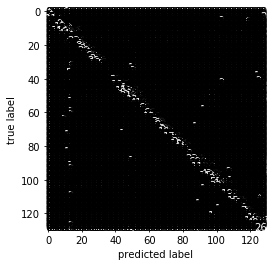

In [74]:
# import matplotlib.pyplot as plt
# from mlxtend.plotting import plot_confusion_matrix
# import numpy as np

# fig, ax = plot_confusion_matrix(conf_mat=cm)
# plt.show()

In [77]:
print(f'Accuracy Score : {accuracy_score(final_pred.subBrand, final_pred.Predictions)}')
print(f'F1 Score: {f1_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Precision: {precision_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Recall: {recall_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')

Accuracy Score : 0.910756591101741


C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score: 0.5525507445124507


C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision: 0.6155554724716263
Recall: 0.5220627036347106


In [88]:
#final_pred.to_csv("final_output_SubBrand_v4.csv", index_label=False, index=False)

In [83]:
len(final_pred)

20860

In [76]:
final_pred.isnull().sum()

description         0
220 - gold          0
230 - silver        0
amarillo            0
anthracite          0
anthrazit           0
aqua                0
assorted            0
battle blue         0
beige               0
binary blue         0
black               0
blau                0
blue                0
blue tint           0
braun               0
brown               0
burgundy crush      0
camo                0
carbon              0
carbon heather      0
cardinal            0
charcoal            0
charcoal heather    0
clear               0
college navy        0
cool grey           0
coral               0
cream               0
creme               0
                   ..
orange              0
petrol              0
pink                0
print               0
purple              0
red                 0
rosa                0
rose                0
rot                 0
rush blue           0
schwarz             0
signal blue         0
silber              0
silver              0
stone     

In [51]:
#test_subBrand

In [52]:
len(submission)

15062

In [54]:
#final_pred.isnull().sum()